In [5]:
!pip install mordred
!pip install umap

     ------------------------------------ 128.8/128.8 kB 189.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176725 sha256=d95e6620173bec876afc437a56ce0f8b2c3130d789b9dd89ac1e115b29d114cc
  Stored in directory: c:\users\bhavi\appdata\local\pip\cache\wheels\05\95\d1\9e913738f0e8362b3676917b953a60afd76d2b0b99ff8a71ec
Successfully built mordred


In [7]:
import os,re,sys,pickle,datetime,time,random,itertools
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from scipy import stats
import math
from tqdm import tqdm
import seaborn as sns
import umap
from multiprocessing import freeze_support
import mordred
from mordred import Calculator, descriptors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA,NMF
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
import rdkit
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem, MolFromSmiles, PandasTools, Descriptors, Draw, PropertyMol, rdmolfiles, rdFMCS
from rdkit import RDConfig
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions, Font
DrawingOptions.bondLineWidth=1.8
DrawingOptions.includeAtomNumbers=False
size = (150, 150)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
randomstate = 42

In [8]:
mols = pd.read_csv('smilesOD.csv')
mols

,smiles
0,C[C@@]12CC[C@@H](C1)C([C@@H]2O)(C)C
1,CCOC(C)OCC
2,CC=O
3,CCCOC(C)OCCc1ccccc1
4,COc1ccc(cc1)C(C)=O
...,...
3085,CCC(O)COC1CCCCC1C(C)(C)C
3086,CCCCC(O)C(C)CCC
3087,CCCCCC#C\C=C\C=C
3088,CC(CC(C)=O)SCc1occc1


In [10]:
mols = mols.drop_duplicates(subset=['smiles'])
mols

,smiles
0,C[C@@]12CC[C@@H](C1)C([C@@H]2O)(C)C
1,CCOC(C)OCC
2,CC=O
3,CCCOC(C)OCCc1ccccc1
4,COc1ccc(cc1)C(C)=O
...,...
3085,CCC(O)COC1CCCCC1C(C)(C)C
3086,CCCCC(O)C(C)CCC
3087,CCCCCC#C\C=C\C=C
3088,CC(CC(C)=O)SCc1occc1


In [12]:
mols['rdmol'] = mols['smiles'].map(lambda x: Chem.MolFromSmiles(x))
mols['inchi'] = mols['rdmol'].map(Chem.MolToInchi)
mols = mols.drop_duplicates(subset="inchi")

print('Number of SMILES after duplicates removed:',len(mols))

mols

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Proton(s) added/removed

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefined stereo

[12:06:09] WARNING: Omitted undefin

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Metal was disconnected

[12:06:10] WARNING: Metal was disconnected

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Proton(s) added/removed

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined s

Number of SMILES after duplicates removed: 2942


[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefined stereo

[12:06:10] WARNING: Omitted undefi

,smiles,rdmol,inchi
0,C[C@@]12CC[C@@H](C1)C([C@@H]2O)(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C10H18O/c1-9(2)7-4-5-10(3,6-7)8(9)11/..."
1,CCOC(C)OCC,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C6H14O2/c1-4-7-6(3)8-5-2/h6H,4-5H2,1-3H3"
2,CC=O,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C2H4O/c1-2-3/h2H,1H3"
3,CCCOC(C)OCCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,InChI=1S/C13H20O2/c1-3-10-14-12(2)15-11-9-13-7...
4,COc1ccc(cc1)C(C)=O,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,InChI=1S/C9H10O2/c1-7(10)8-3-5-9(11-2)6-4-8/h3...
...,...,...,...
3085,CCC(O)COC1CCCCC1C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C14H28O2/c1-5-11(15)10-16-13-9-7-6-8-...
3086,CCCCC(O)C(C)CCC,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C10H22O/c1-4-6-8-10(11)9(3)7-5-2/h9-1...
3087,CCCCCC#C\C=C\C=C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,"InChI=1S/C11H16/c1-3-5-7-9-11-10-8-6-4-2/h3,5,..."
3088,CC(CC(C)=O)SCc1occc1,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C10H14O2S/c1-8(11)6-9(2)13-7-10-4-3-5...


In [13]:
def embed(mol):
    mol_with_H = Chem.AddHs(mol)
    Chem.AllChem.EmbedMolecule(mol_with_H)
    Chem.AllChem.MMFFOptimizeMolecule(mol_with_H)
    return mol_with_H

mols['rdmol_optimized'] = mols.rdmol.map(embed)

mols

[12:09:30] UFFTYPER: Unrecognized atom type: Zn+2 (1)
[12:09:30] UFFTYPER: Unrecognized atom type: Cu5+1 (1)
[12:09:52] UFFTYPER: Warning: hybridization set to SP3 for atom 1
[12:09:53] UFFTYPER: Unrecognized charge state for atom: 1


,smiles,rdmol,inchi,rdmol_optimized
0,C[C@@]12CC[C@@H](C1)C([C@@H]2O)(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C10H18O/c1-9(2)7-4-5-10(3,6-7)8(9)11/...",<rdkit.Chem.rdchem.Mol object at 0x000001BB5AA...
1,CCOC(C)OCC,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C6H14O2/c1-4-7-6(3)8-5-2/h6H,4-5H2,1-3H3",<rdkit.Chem.rdchem.Mol object at 0x000001BB5AA...
2,CC=O,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,"InChI=1S/C2H4O/c1-2-3/h2H,1H3",<rdkit.Chem.rdchem.Mol object at 0x000001BB5AA...
3,CCCOC(C)OCCc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,InChI=1S/C13H20O2/c1-3-10-14-12(2)15-11-9-13-7...,<rdkit.Chem.rdchem.Mol object at 0x000001BB5AA...
4,COc1ccc(cc1)C(C)=O,<rdkit.Chem.rdchem.Mol object at 0x000001BB5BA...,InChI=1S/C9H10O2/c1-7(10)8-3-5-9(11-2)6-4-8/h3...,<rdkit.Chem.rdchem.Mol object at 0x000001BB5AA...
...,...,...,...,...
3085,CCC(O)COC1CCCCC1C(C)(C)C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C14H28O2/c1-5-11(15)10-16-13-9-7-6-8-...,<rdkit.Chem.rdchem.Mol object at 0x000001BB5DB...
3086,CCCCC(O)C(C)CCC,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C10H22O/c1-4-6-8-10(11)9(3)7-5-2/h9-1...,<rdkit.Chem.rdchem.Mol object at 0x000001BB5DB...
3087,CCCCCC#C\C=C\C=C,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,"InChI=1S/C11H16/c1-3-5-7-9-11-10-8-6-4-2/h3,5,...",<rdkit.Chem.rdchem.Mol object at 0x000001BB5DB...
3088,CC(CC(C)=O)SCc1occc1,<rdkit.Chem.rdchem.Mol object at 0x000001BB5CB...,InChI=1S/C10H14O2S/c1-8(11)6-9(2)13-7-10-4-3-5...,<rdkit.Chem.rdchem.Mol object at 0x000001BB5DB...


In [14]:
calc = Calculator(descriptors) # create calculator for all mordred descriptors (can also specify subtype)

df=calc.pandas(mols['rdmol_optimized'])
print(df)

 67%|██████▋   | 1973/2942 [03:16<03:34,  4.52it/s]

C:\Users\bhavi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 68%|██████▊   | 2008/2942 [03:21<03:20,  4.65it/s]

C:\Users\bhavi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 2942/2942 [04:46<00:00, 10.27it/s]


            ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0      8.886598   8.837173      0      0  13.412165  2.595011  4.958928   
1      5.059137   5.456585      0      0   8.828427  2.000000  4.000000   
2      1.414214   1.414214      0      0   2.828427  1.414214  2.828427   
3     10.715992   9.329320      0      0  18.906808  2.167548  4.335096   
4      7.956514   7.451864      0      0  13.619695  2.250875  4.501749   
...         ...        ...    ...    ...        ...       ...       ...   
3085  11.797804  10.944648      0      0  19.153277  2.365359  4.730717   
3086   7.249407   7.548361      0      0  12.824422  2.133003  4.266007   
3087   7.071068   6.765664      0      0  13.191508  1.931852  3.863703   
3088   9.520558   9.114053      0      0  15.514990  2.195484  4.304653   
3089   8.134854   7.770338      0      0  12.675204  2.302776  4.605551   

         SpAD_A   SpMAD_A   LogEE_A  ...     SRW10     TSRW10          MW  \
0     13.412165  1.219

In [15]:
#Replace mordred errors with NaNs then drop those descriptors/columns
df=df.applymap(lambda x: np.nan if type(x) in [mordred.error.Missing,mordred.error.Error] else x)
df=df.dropna(axis=1)
print(df.shape)

(2942, 1180)


In [16]:
#Dropping columns that have a single value
non_zero_std = df.std() != 0
df = df [non_zero_std[non_zero_std].index]
print(df.shape)

(2942, 1050)


In [17]:
#Dropping highly correlated descriptors: If a pair of descriptors have a Pearson correlation coefficient (r) value greater than the threshold then one descriptor will be removed.
threshold=0.95
df_corr = df.corr().abs()
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df = df.drop(to_drop, axis=1)
print(df.shape)

(2942, 491)


In [18]:
#saving the csv list
to_save=pd.concat([mols[['smiles']], df], axis=1)
to_save

,smiles,ABC,nAcid,nBase,SpMax_A,SpMAD_A,LogEE_A,VE1_A,VR1_A,nAromAtom,...,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,SRW05,TSRW10
0,C[C@@]12CC[C@@H](C1)C([C@@H]2O)(C)C,8.886598,0,0,2.595011,1.219288,3.388635,3.100165,38.528333,0,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.744635,3.044522,59.809921
1,CCOC(C)OCC,5.059137,0,0,2.000000,1.103553,2.888532,2.598076,21.904303,0,...,0.016000,0.027778,0.000000,0.000000,0.000000,0.000000,0.00000,0.415802,0.000000,33.420942
2,CC=O,1.414214,0,0,1.414214,0.942809,1.849457,1.707107,3.363586,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.250000,0.000000,17.310771
3,CCCOC(C)OCCc1ccccc1,10.715992,0,0,2.167548,1.260454,3.573727,3.369615,105.265221,6,...,0.019259,0.018308,0.014204,0.007330,0.007595,0.005125,0.00687,0.293479,0.000000,45.146515
4,COc1ccc(cc1)C(C)=O,7.956514,0,0,2.250875,1.238154,3.286693,3.095000,39.103451,6,...,0.052778,0.074653,0.027211,0.000000,0.000000,0.000000,0.00000,0.515614,0.000000,40.567492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,CCC(O)COC1CCCCC1C(C)(C)C,11.797804,0,0,2.365359,1.197080,3.658748,3.392946,112.976878,0,...,0.037895,0.037037,0.027279,0.014994,0.005102,0.000000,0.00000,0.564090,0.000000,47.933172
3086,CCCCC(O)C(C)CCC,7.249407,0,0,2.133003,1.165857,3.220019,2.913900,43.460607,0,...,0.035556,0.015873,0.010204,0.015625,0.000000,0.000000,0.00000,0.455288,0.000000,38.967611
3087,CCCCCC#C\C=C\C=C,7.071068,0,0,1.931852,1.199228,3.202455,3.100954,38.458677,0,...,0.011429,0.009259,0.008163,0.007812,0.008230,0.010000,0.00000,0.145210,0.000000,37.236738
3088,CC(CC(C)=O)SCc1occc1,9.520558,0,0,2.195484,1.193461,3.446016,3.261773,59.472827,5,...,0.033182,0.015802,0.024093,0.014031,0.015625,0.000000,0.00000,0.443351,2.397895,55.767435


In [19]:
to_save.to_csv('mordred_descriptors.csv', index = True)

In [ ]:
#STARTING THE PCA OF THE OBTAINED DESCRIPTORS

In [20]:
df.index = df.index.astype(int)
df.dropna(axis=0,inplace=True)
X_all = np.array(df)
X_all_ids = np.array(df.index)
scaler = StandardScaler()
scaler.fit(X_all)
X_all_sc = scaler.transform(X_all)

pca = PCA(n_components=10)     # choose number of PCs

pca.fit(X_all_sc)
X_all_pca    = pca.transform(X_all_sc)
pca_score = pca.explained_variance_ratio_
pca_values = pca.singular_values_
print('Variance explained by individual PCs:',np.around(pca.explained_variance_ratio_, decimals=2),'\n')
print('Total variance explained by PCs:',np.around(np.sum(pca.explained_variance_ratio_), decimals=2))

Variance explained by individual PCs: [0.14 0.13 0.08 0.06 0.04 0.03 0.03 0.02 0.02 0.02] 

Total variance explained by PCs: 0.56


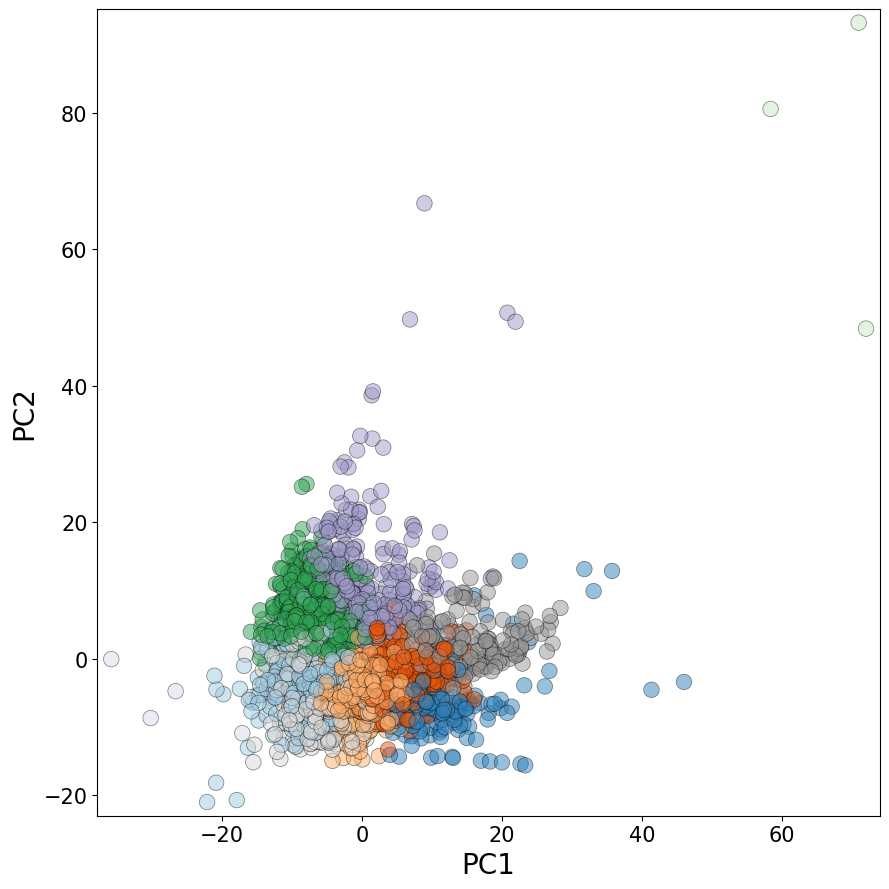

In [21]:
nclusters = 10     # choose number of clusters

####################################################################################

X_use = X_all_pca
X_main_ids = X_all_ids
X_kmeans = X_all_pca
kmeans = KMeans(n_clusters=nclusters, random_state=42).fit(X_kmeans)
dists = []
for x in range(len(X_kmeans)):
    delta = [X_kmeans[x,i]-kmeans.cluster_centers_[kmeans.labels_[x],i] for i in range(len(X_kmeans[0]))]
    dist = np.linalg.norm(delta)
    dists.append(dist)
clusters = {}
clusterdists = {}
clustermins = []
clusterorders_dict = {}
clusterorders = np.zeros(X_kmeans.shape[0])
for x in range(nclusters):
    clusters[x] = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == x]
    clusterdists[x] = [dists[i] for i in clusters[x]]
    clustermins.append(clusters[x][clusterdists[x].index(min(clusterdists[x]))])
    clusterorders_dict[x] = [y for _,y in sorted(zip(clusterdists[x],clusters[x]))]
    for i in clusters[x]:
        clusterorders[i] = clusterorders_dict[x].index(i)+1
f_ind_1 = 0
f_ind_2 = 1
x_min, x_max = X_kmeans[:, f_ind_1].min() - 2, X_kmeans[:, f_ind_1].max() + 2
y_min, y_max = X_kmeans[:, f_ind_2].min() - 2, X_kmeans[:, f_ind_2].max() + 2
plt.figure(figsize=(9,9))
extent = [x_min,x_max,y_min,y_max]
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel(r"PC1",fontsize=20)
plt.ylabel(r"PC2",fontsize=20)
plt.locator_params(axis='y', nbins=8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
mapping = kmeans.labels_
cMap = "tab20c"
plt.scatter(X_kmeans[:,f_ind_1], X_kmeans[:,f_ind_2],c=mapping,cmap=cMap,alpha=.5,marker=".",s=500,edgecolor="black",linewidth=0.5)
main_row_id = list(enumerate(X_main_ids))
clusters_with_ids = {}
for i in range(0,len(clusters)):
    emptylist = []
    for j in range(0,len(clusters[i])):
        emptylist.append(main_row_id[clusters[i][j]][1])
    clusters_with_ids[i] = emptylist
    
### plot ligand ids    
#for i in range(0,nclusters):
#    for j in range(0,len(clusters_with_ids[i])):
#        plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="blue",fontsize=12,ha="left")

### plot centroid labels
#for i in range(0,nclusters):
#    for j in range(0,len(clusters_with_ids[i])):
#        if clusters[i][j] in clustermins:
#            plt.text(X_use[clusters[i][j],f_ind_1],X_use[clusters[i][j],f_ind_2]," "+str(clusters_with_ids[i][j]),color="red",fontsize=13,ha="right")
    
plt.tight_layout()
#plt.savefig("mordred_pca_plot.png",dpi=300)
plt.show()     


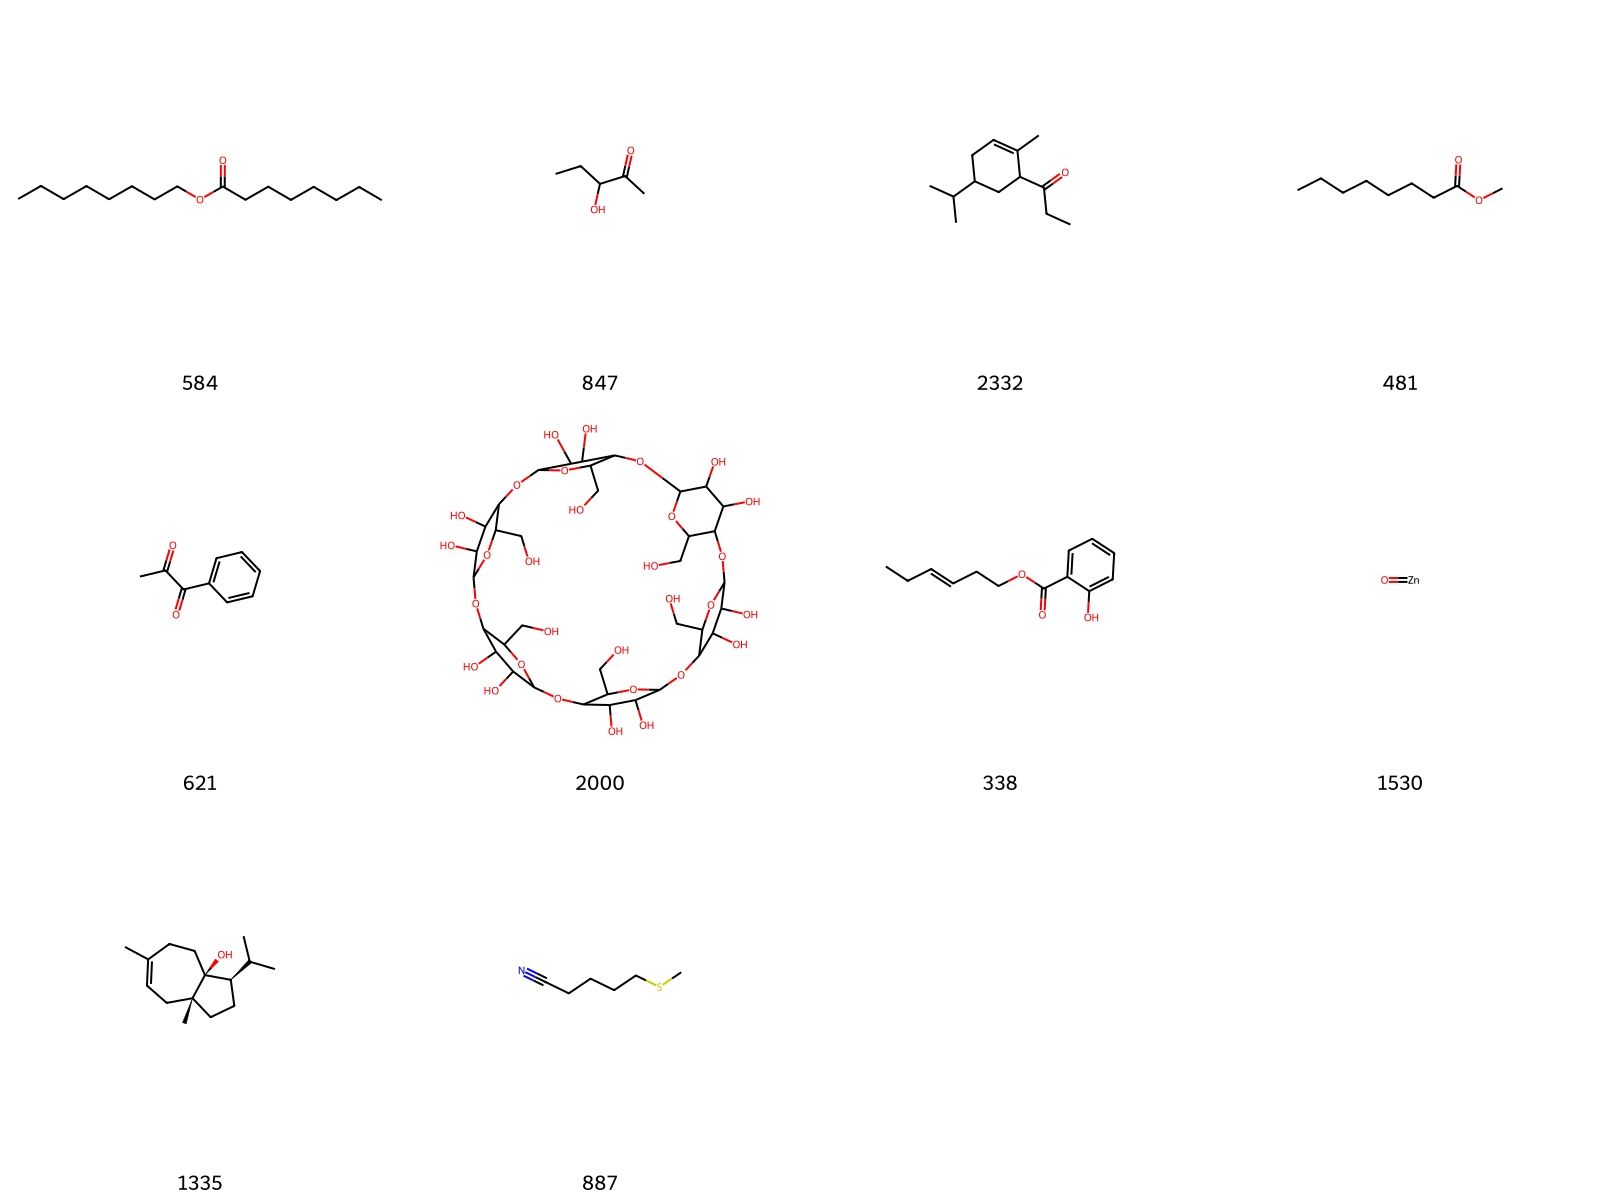

In [23]:
#printing structures closest to the centroids
smiles = list(mols['smiles'])

closest_to_centroids = []
for i in clustermins:
    closest_to_centroids.append(smiles[i])

count=0
subms = []
for i in closest_to_centroids:
    x = Chem.MolFromSmiles(i)
    count+=1
    subms.append(x)
clustermins_str = [str(i) for i in clustermins]
my_labels = clustermins_str  
molsPerRow = 4
subImgSize= (400,400)
nRows = -(count // -molsPerRow)
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
img = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1]) # setting up the image
img.drawOptions().legendFontSize=20
img.DrawMolecules(subms[:],legends=my_labels[:])
img.SetFontSize(40)
img.FinishDrawing()

with open('centroids.png','wb+') as wfp:      # opening a png file, goes into current folder
    wfp.write(img.GetDrawingText())           # saving in the image
Image.open('centroids.png')                   # opening it in the notebook